In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,f1_score,classification_report

In [3]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

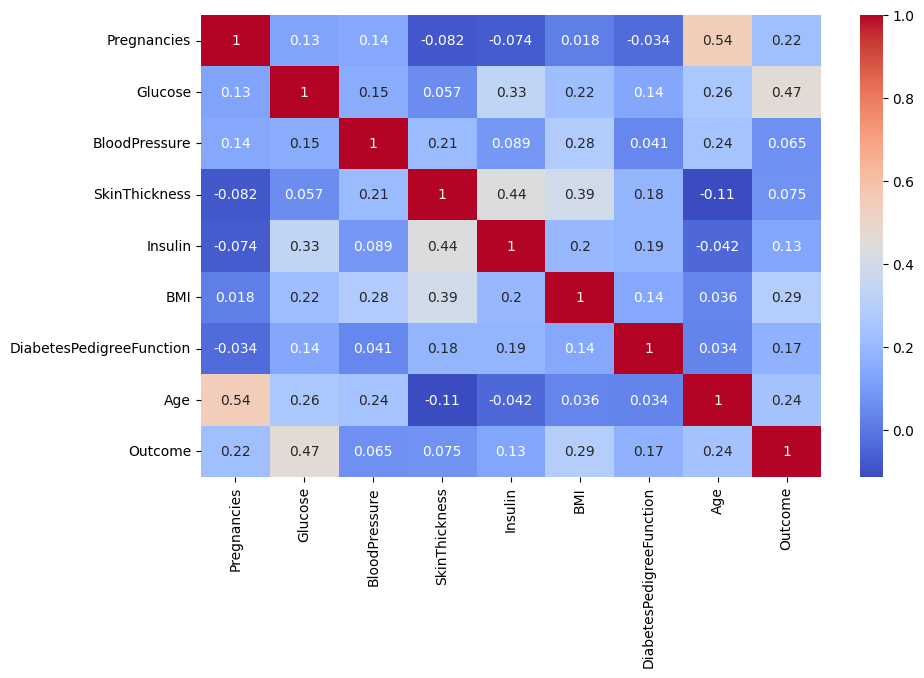

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot = True , cmap="coolwarm")


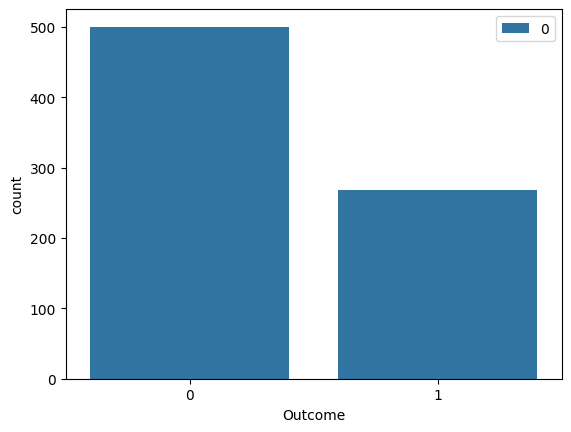

In [8]:
sns.countplot(data=data,x="Outcome")
plt.legend("1=Diabetic")
plt.legend("0=NonDiabetic")

In [9]:
data.drop(columns=["SkinThickness","Pregnancies"],inplace=True)

In [21]:
data.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
x=data.drop(columns=["Outcome"])
y=data["Outcome"]

In [11]:
# Replace 0 with NaN in these columns
cols_with_zero = ["Glucose", "BloodPressure", "Insulin", "BMI"]
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

# Impute missing values with median
data[cols_with_zero] = data[cols_with_zero].fillna(data[cols_with_zero].median())

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_train, y_train = smote.fit_resample(x_train, y_train)
# x_test, y_test = smote.fit_resample(x_test, y_test)


In [13]:
models={
    "DecisionTreeClassifier()":DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "RandomForest_bal": RandomForestClassifier(
        n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=2,
        class_weight="balanced_subsample", random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }

In [14]:
def evaluate_model(true,prediction):
    mse=mean_squared_error(true,prediction)
    mae=mean_absolute_error(true,prediction)
    f1_scr=f1_score(true,prediction)
    sqrt=mean_squared_error(true,prediction)
    return mse, mae, f1_scr, sqrt


In [15]:
model_list=[]
Accuracy_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    print(f"{list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    train_mae,train_mse,f1_scr,train_sqrt=evaluate_model(y_train,train_pred)
    test_mae,test_mse,f1_scr,test_sqrt=evaluate_model(y_test,test_pred)

    print("training Mae",train_mae)
    print("Train Mse",train_mse)
    print("train f1 score",f1_scr)
    print("Test Squared error",train_sqrt)

    print("TEST Mae",test_mae)
    print("Test Mse",test_mse)
    print("Test f1 score",f1_scr)
    print(" Test Squared error",test_sqrt)
    print("Model Accuracy",model.score(x_test,y_test))
    Accuracy_list.append(model.score(x_test,y_test))
    print("---"*20)
    print('\n')


DecisionTreeClassifier()
training Mae 0.0
Train Mse 0.0
train f1 score 0.6333333333333333
Test Squared error 0.0
TEST Mae 0.2857142857142857
Test Mse 0.2857142857142857
Test f1 score 0.6333333333333333
 Test Squared error 0.2857142857142857
Model Accuracy 0.7142857142857143
------------------------------------------------------------


XGBClassifier
training Mae 0.0
Train Mse 0.0
train f1 score 0.6557377049180327
Test Squared error 0.0
TEST Mae 0.2727272727272727
Test Mse 0.2727272727272727
Test f1 score 0.6557377049180327
 Test Squared error 0.2727272727272727
Model Accuracy 0.7272727272727273
------------------------------------------------------------


AdaBoostClassifier
training Mae 0.1970684039087948
Train Mse 0.1970684039087948
train f1 score 0.7017543859649122
Test Squared error 0.1970684039087948
TEST Mae 0.22077922077922077
Test Mse 0.22077922077922077
Test f1 score 0.7017543859649122
 Test Squared error 0.22077922077922077
Model Accuracy 0.7792207792207793
------------------

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:25:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


------------------------------------------------------------




In [16]:
pd.DataFrame(list(zip(model_list,Accuracy_list)),columns=["Model Name", "Accuracy"]).sort_values(by=["Accuracy"],ascending=False)

Model Name  Accuracy
2        AdaBoostClassifier  0.779221
4       Logistic Regression  0.759740
5          RandomForest_bal  0.753247
1             XGBClassifier  0.727273
3            LGBMClassifier  0.727273
6                   XGBoost  0.727273
0  DecisionTreeClassifier()  0.714286

In [17]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7792207792207793

In [18]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



<Axes: xlabel='Importance', ylabel='Features'>

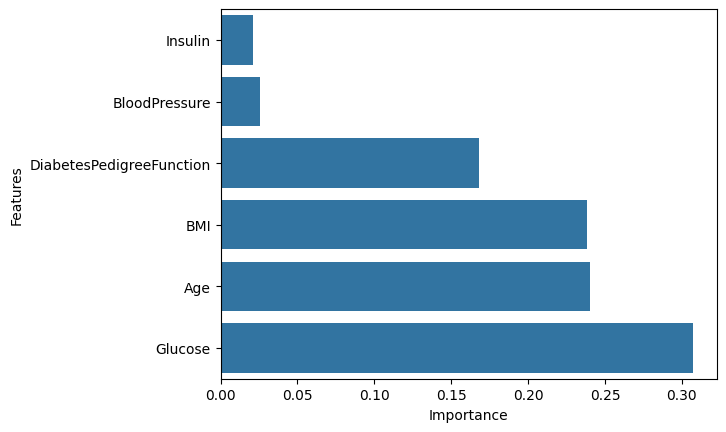

In [19]:
features=x.columns
impoortance=model.feature_importances_

feat_df=pd.DataFrame({"Features":features,"Importance":impoortance})
feat_df=feat_df.sort_values(by="Importance")
sns.barplot(data=feat_df,x="Importance",y="Features")

In [20]:
import joblib
joblib.dump(model,"Diabetese_model.pkl")

['Diabetese_model.pkl']